## NBA Basketball - Offensive and Defensive Game Play

In [1]:
from pymongo import MongoClient
import pprint

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

# Requests sends and receives HTTP requests.
import requests

import json
import time
import copy

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
from nba_api.stats.static import teams
from nba_api.stats.static import players
from nba_api.stats.endpoints import leaguegamelog
from nba_api.stats.endpoints import leaguedashteamstats
from nba_api.stats.endpoints import boxscorefourfactorsv2
from nba_api.stats.endpoints import boxscoreadvancedv2

In [4]:
teams_df = pd.DataFrame(teams.get_teams())
teams_df.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [5]:
player_df = pd.DataFrame(players.get_players())
player_df.head()

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,False
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,False
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,False
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,False


In [6]:
#game_log_1819 = leaguegamelog.LeagueGameLog(counter = 0, direction = "DESC",
#                 league_id = "00", player_or_team_abbreviation = "T", season = "2018-19",
#                 season_type_all_star = "Regular Season", sorter = "DATE").get_data_frames()

In [7]:
#game_log_1819[0].to_csv(r'../data_1/game_log_1819.csv', index=False)

In [8]:
types_dict = {'GAME_ID': str}
game_log_1819 = pd.read_csv('../data_1/game_log_1819.csv', dtype=types_dict)
game_log_1819.head() 
#2018-19 Regular season game log 

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22018,1610612744,GSW,Golden State Warriors,0021801225,2019-04-10,GSW @ MEM,L,240,46,92,0.500,13,30,0.433,12,14,0.857,9,30,39,32,3,5,14,17,117,-15,1
1,22018,1610612763,MEM,Memphis Grizzlies,0021801225,2019-04-10,MEM vs. GSW,W,240,48,98,0.490,21,46,0.457,15,18,0.833,15,34,49,25,9,0,11,18,132,15,1
2,22018,1610612766,CHA,Charlotte Hornets,0021801222,2019-04-10,CHA vs. ORL,L,240,41,78,0.526,8,29,0.276,24,27,0.889,4,28,32,21,3,4,8,14,114,-8,1
3,22018,1610612753,ORL,Orlando Magic,0021801222,2019-04-10,ORL @ CHA,W,240,48,88,0.545,11,30,0.367,15,20,0.750,9,30,39,24,5,2,6,19,122,8,1
4,22018,1610612750,MIN,Minnesota Timberwolves,0021801228,2019-04-10,MIN @ DEN,L,240,39,91,0.429,13,32,0.406,4,6,0.667,7,34,41,24,6,0,10,22,95,-4,1


In [9]:
game_id_lst = game_log_1819['GAME_ID'].tolist() #list created to iterate over advanced game stats below

In [10]:
#leaguedashteamstats = leaguedashteamstats.LeagueDashTeamStats(season = "2018-19", season_type_all_star='Regular Season').get_data_frames()

In [11]:
#leaguedashteamstats[0].to_csv(r'../data_1/leaguedashteamstats.csv', index=False)

In [12]:
leaguedashteamstats = pd.read_csv('../data_1/leaguedashteamstats.csv')
leaguedashteamstats.head()
#league stats by team for 2018-19 regular season

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612737,Atlanta Hawks,82,29,53,0.354,3971.0,3392,7524,0.451,1067,3034,0.352,1443,1918,0.752,955,2825,3780,2118,1397.0,675,419,448,1932,1817,9294,-494.0,1,26,26,26,7,15,4,21,4,3,16,18,12,21,4,18,12,10,30,11,14,24,29,5,12,26,10,Atlanta Hawks
1,1610612738,Boston Celtics,82,49,33,0.598,3956.0,3451,7423,0.465,1032,2829,0.365,1282,1598,0.802,804,2849,3653,2155,1052.0,706,435,317,1670,1602,9216,364.0,1,9,9,9,18,11,9,14,6,7,7,28,29,4,20,16,22,5,3,4,10,2,12,26,14,6,10,Boston Celtics
2,1610612751,Brooklyn Nets,82,42,40,0.512,3996.0,3301,7358,0.449,1047,2965,0.353,1555,2088,0.745,900,2919,3819,1954,1236.0,539,339,432,1763,1807,9204,-6.0,1,14,14,14,1,20,14,25,5,5,14,6,4,24,10,10,7,21,26,27,28,22,23,7,15,15,10,Brooklyn Nets
3,1610612766,Charlotte Hornets,82,39,43,0.476,3966.0,3297,7362,0.448,977,2783,0.351,1510,1895,0.797,814,2778,3592,1905,1001.0,591,405,492,1550,1686,9081,-90.0,1,17,17,17,11,21,12,26,11,10,18,9,16,6,19,22,23,24,2,21,18,29,3,18,19,18,10,Charlotte Hornets
4,1610612741,Chicago Bulls,82,22,60,0.268,3981.0,3266,7205,0.453,745,2123,0.351,1328,1695,0.783,718,2799,3517,1796,1159.0,603,351,473,1663,1534,8605,-690.0,1,27,27,27,3,23,22,20,30,27,19,25,26,11,30,21,25,27,19,20,26,28,9,30,27,27,10,Chicago Bulls


In [13]:
# boxscoreadvancedv2_df = pd.DataFrame()
# for game_id in game_id_lst:
#     a = boxscoreadvancedv2.BoxScoreAdvancedV2(game_id=game_id).team_stats
#     b = a.get_data_frame()
#     boxscoreadvancedv2_df = boxscoreadvancedv2_df.append(b, ignore_index=True)
#     time.sleep(2)

In [14]:
# boxscoreadvancedv2_df = boxscoreadvancedv2_df.drop_duplicates(ignore_index=True)

In [15]:
# boxscoreadvancedv2_df.to_csv(r'../data_1/boxscoreadvancedv2.csv', index=False)

In [16]:
boxscoreadvancedv2 = pd.read_csv('../data_1/boxscoreadvancedv2.csv', dtype=types_dict)
boxscoreadvancedv2.head()
#2018-19 Regular season advanced game stats

,GAME_ID,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CITY,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,E_TM_TOV_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,0021801225,1610612763,Grizzlies,MEM,Memphis,240:00,129.5,130.7,113.4,115.8,16.1,14.9,0.521,2.27,17.6,0.346,0.745,0.535,10.793,10.9,0.597,0.623,1.0,0.200,102.54,101.0,84.17,101,0.533
1,0021801225,1610612744,Warriors,GSW,Golden State,240:00,113.4,115.8,129.5,130.7,-16.1,-14.9,0.696,2.29,22.2,0.255,0.654,0.465,13.571,13.9,0.571,0.596,1.0,0.198,102.54,101.0,84.17,101,0.467
2,0021801222,1610612753,Magic,ORL,Orlando,240:00,130.1,131.2,121.4,122.6,8.6,8.6,0.500,4.00,18.9,0.286,0.816,0.538,6.397,6.5,0.608,0.630,1.0,0.200,93.84,93.0,77.50,93,0.519
3,0021801222,1610612766,Hornets,CHA,Charlotte,240:00,121.4,122.6,130.1,131.2,-8.6,-8.6,0.512,2.63,17.7,0.184,0.714,0.463,8.522,8.6,0.577,0.634,1.0,0.200,93.84,93.0,77.50,93,0.481
4,0021801228,1610612750,Timberwolves,MIN,Minnesota,240:00,98.3,99.0,103.7,103.1,-5.4,-4.2,0.615,2.40,18.8,0.167,0.745,0.448,10.348,10.4,0.500,0.507,1.0,0.199,96.06,96.0,80.00,96,0.438


### General Dataset Information

In [17]:
game_log_1819.shape

(2460, 29)

In [18]:
game_log_1819.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEASON_ID          2460 non-null   int64  
 1   TEAM_ID            2460 non-null   int64  
 2   TEAM_ABBREVIATION  2460 non-null   object 
 3   TEAM_NAME          2460 non-null   object 
 4   GAME_ID            2460 non-null   object 
 5   GAME_DATE          2460 non-null   object 
 6   MATCHUP            2460 non-null   object 
 7   WL                 2460 non-null   object 
 8   MIN                2460 non-null   int64  
 9   FGM                2460 non-null   int64  
 10  FGA                2460 non-null   int64  
 11  FG_PCT             2460 non-null   float64
 12  FG3M               2460 non-null   int64  
 13  FG3A               2460 non-null   int64  
 14  FG3_PCT            2460 non-null   float64
 15  FTM                2460 non-null   int64  
 16  FTA                2460 

In [19]:
game_log_1819.describe()

,SEASON_ID,TEAM_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
count,2460.0,2.460000e+03,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,22018.0,1.610613e+09,241.646341,41.082114,89.210569,0.461429,11.363821,32.008943,0.355224,17.680488,23.072358,0.767115,10.347154,34.818293,45.165447,24.586585,7.633740,4.953252,14.082927,20.904472,111.208537,0.000000,1.011382
std,0.0,8.657201e+00,7.601350,5.219906,7.332872,0.053312,3.730194,7.310012,0.086793,6.087503,7.466480,0.102344,3.758657,5.468226,6.692565,5.119577,2.947763,2.485716,3.927105,4.293642,12.651393,14.659231,0.106100
min,22018.0,1.610613e+09,240.000000,25.000000,64.000000,0.278000,2.000000,12.000000,0.115000,2.000000,4.000000,0.263000,1.000000,18.000000,22.000000,10.000000,0.000000,0.000000,3.000000,9.000000,68.000000,-56.000000,1.000000
25%,22018.0,1.610613e+09,240.000000,38.000000,85.000000,0.426000,9.000000,27.000000,0.296000,13.000000,18.000000,0.700000,8.000000,31.000000,41.000000,21.000000,6.000000,3.000000,11.000000,18.000000,103.000000,-9.000000,1.000000
50%,22018.0,1.610613e+09,240.000000,41.000000,89.000000,0.460000,11.000000,32.000000,0.353000,17.000000,23.000000,0.771000,10.000000,35.000000,45.000000,24.000000,7.000000,5.000000,14.000000,21.000000,111.000000,0.000000,1.000000
75%,22018.0,1.610613e+09,240.000000,44.000000,94.000000,0.495000,14.000000,37.000000,0.409250,22.000000,28.000000,0.840000,13.000000,38.000000,50.000000,28.000000,9.000000,6.000000,17.000000,24.000000,120.000000,9.000000,1.000000
max,22018.0,1.610613e+09,340.000000,61.000000,123.000000,0.649000,27.000000,70.000000,0.842000,44.000000,54.000000,1.000000,26.000000,55.000000,71.000000,42.000000,20.000000,19.000000,29.000000,38.000000,168.000000,56.000000,2.000000


In [20]:
leaguedashteamstats.shape

(30, 56)

In [21]:
leaguedashteamstats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 56 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TEAM_ID          30 non-null     int64  
 1   TEAM_NAME        30 non-null     object 
 2   GP               30 non-null     int64  
 3   W                30 non-null     int64  
 4   L                30 non-null     int64  
 5   W_PCT            30 non-null     float64
 6   MIN              30 non-null     float64
 7   FGM              30 non-null     int64  
 8   FGA              30 non-null     int64  
 9   FG_PCT           30 non-null     float64
 10  FG3M             30 non-null     int64  
 11  FG3A             30 non-null     int64  
 12  FG3_PCT          30 non-null     float64
 13  FTM              30 non-null     int64  
 14  FTA              30 non-null     int64  
 15  FT_PCT           30 non-null     float64
 16  OREB             30 non-null     int64  
 17  DREB             3

In [22]:
leaguedashteamstats.describe()

,TEAM_ID,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID
count,3.000000e+01,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,1.610613e+09,82.0,41.000000,41.000000,0.499967,3963.000000,3368.733333,7315.266667,0.460467,931.833333,2624.733333,0.355500,1449.800000,1891.933333,0.766967,848.466667,2855.100000,3703.566667,2016.100000,1154.800000,625.966667,406.166667,406.166667,1714.166667,1714.166667,9119.100000,0.000000,1.0,15.066667,15.066667,15.066667,14.200000,15.500000,15.500000,15.500000,15.433333,15.500000,15.500000,15.500000,15.500000,15.500000,15.466667,15.500000,15.500000,15.500000,15.466667,15.466667,15.366667,15.433333,15.433333,15.500000,15.500000,15.500000,10.0
std,8.803408e+00,0.0,12.028701,12.028701,0.146707,12.905492,136.817506,173.173211,0.013235,123.406277,352.776860,0.015321,138.973925,179.032252,0.032196,80.669070,148.530352,173.482720,171.239769,84.063359,69.176179,59.700450,49.964873,109.128549,103.628342,335.555674,400.712727,0.0,8.737290,8.737290,8.737290,8.563757,8.803408,8.803408,8.803408,8.807064,8.803408,8.803408,8.803408,8.803408,8.803408,8.764086,8.803408,8.803408,8.803408,8.818997,8.834624,8.755228,8.826619,8.756016,8.803408,8.803408,8.803408,0.0
min,1.610613e+09,82.0,17.000000,22.000000,0.207000,3941.000000,3113.000000,6924.000000,0.433000,745.000000,2071.000000,0.329000,1231.000000,1575.000000,0.695000,718.000000,2563.000000,3311.000000,1646.000000,992.000000,501.000000,195.000000,295.000000,1487.000000,1534.000000,8490.000000,-788.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.0
25%,1.610613e+09,82.0,33.000000,32.250000,0.402000,3956.000000,3271.750000,7189.250000,0.450000,830.750000,2405.250000,0.348000,1339.750000,1740.750000,0.748250,794.500000,2769.000000,3607.250000,1917.250000,1103.000000,563.000000,380.500000,370.750000,1653.250000,1644.500000,8825.500000,-136.500000,1.0,8.250000,8.250000,8.250000,7.000000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,7.500000,8.250000,8.250000,8.250000,8.250000,8.250000,8.250000,10.0
50%,1.610613e+09,82.0,41.500000,40.500000,0.506000,3961.000000,3391.000000,7306.000000,0.461500,927.500000,2602.000000,0.352500,1451.000000,1899.500000,0.771500,833.500000,2864.000000,3720.000000,2015.500000,1148.500000,621.500000,415.500000,413.000000,1712.500000,1702.500000,9184.500000,-12.500000,1.0,15.000000,15.000000,15.000000,15.000000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,15.500000,10.0
75%,1.610613e+09,82.0,49.750000,49.000000,0.607000,3971.000000,3466.000000,7424.500000,0.470750,1009.500000,2815.250000,0.359000,1532.500000,1987.000000,0.791750,908.250000,2932.000000,3803.250000,2131.750000,1204.250000,682.250000,439.250000,441.750000,1761.500000,1785.750000,9378.750000,312.750000,1.0,22.000000,22.000000,22.000000,18.000000,22.750000,22.750000,22.750000,22.7

In [23]:
boxscoreadvancedv2.shape

(2460, 29)

In [24]:
boxscoreadvancedv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GAME_ID            2460 non-null   object 
 1   TEAM_ID            2460 non-null   int64  
 2   TEAM_NAME          2460 non-null   object 
 3   TEAM_ABBREVIATION  2460 non-null   object 
 4   TEAM_CITY          2460 non-null   object 
 5   MIN                2460 non-null   object 
 6   E_OFF_RATING       2460 non-null   float64
 7   OFF_RATING         2460 non-null   float64
 8   E_DEF_RATING       2460 non-null   float64
 9   DEF_RATING         2460 non-null   float64
 10  E_NET_RATING       2460 non-null   float64
 11  NET_RATING         2460 non-null   float64
 12  AST_PCT            2460 non-null   float64
 13  AST_TOV            2460 non-null   float64
 14  AST_RATIO          2460 non-null   float64
 15  OREB_PCT           2460 non-null   float64
 16  DREB_PCT           2460 

In [25]:
boxscoreadvancedv2.describe()

,TEAM_ID,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,E_TM_TOV_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
count,2.460000e+03,2460.000000,2460.000000,2460.000000,2460.000000,2460.00000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.0,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,1.610613e+09,107.926789,109.749146,107.926789,109.749146,0.00000,0.000000,0.598035,1.916317,17.735488,0.269471,0.730543,0.500003,13.639823,13.875813,0.525283,0.560642,1.0,0.198377,102.400187,100.666772,83.888911,101.351626,0.500002
std,8.657201e+00,11.190650,11.084356,11.190650,11.084356,14.88286,14.444272,0.095416,0.796123,3.085337,0.069273,0.069277,0.048855,3.653009,3.725892,0.063038,0.059069,0.0,0.002163,4.880850,4.864408,4.053590,5.744345,0.086762
min,1.610613e+09,65.800000,67.300000,65.800000,67.300000,-62.00000,-59.600000,0.270000,0.420000,7.700000,0.045000,0.479000,0.337000,3.002000,3.000000,0.320000,0.360000,1.0,0.188000,89.500000,87.000000,72.500000,87.000000,0.134000
25%,1.610613e+09,100.575000,102.200000,100.575000,102.200000,-10.10000,-9.125000,0.537000,1.380000,15.600000,0.220000,0.684000,0.468000,11.133500,11.400000,0.483000,0.521000,1.0,0.197000,99.080000,97.500000,81.250000,98.000000,0.441000
50%,1.610613e+09,107.900000,109.650000,107.900000,109.650000,0.00000,0.000000,0.600000,1.750000,17.700000,0.268000,0.732000,0.500000,13.435500,13.700000,0.523000,0.560000,1.0,0.199000,102.200000,100.500000,83.750000,101.000000,0.500000
75%,1.610613e+09,115.125000,117.200000,115.125000,117.200000,10.10000,9.125000,0.667000,2.250000,19.800000,0.316000,0.780000,0.532000,15.991750,16.300000,0.567000,0.599000,1.0,0.200000,105.580000,104.000000,86.670000,105.000000,0.559000
max,1.610613e+09,150.900000,146.200000,150.900000,146.200000,62.00000,59.600000,0.886000,8.330000,27.700000,0.521000,0.955000,0.663000,27.440000,27.500000,0.739000,0.750000,1.0,0.203000,116.780000,115.500000,96.250000,145.000000,0.866000


### Data Preparation

In [26]:
game_log_1819['FTA_RATE'] = game_log_1819['FTA'] / game_log_1819['FGA']
#free throw attempt divided by field goal attempt rate column addition

In [27]:
game_win_query = game_log_1819.query('WL == "W"')
game_loss_query = game_log_1819.query('WL == "L"')

In [28]:
game_log_1819_subset = game_log_1819[['GAME_ID', 'TEAM_ID', 'WL']]
#subset created to insert 'WL' column to boxadvancedv2 dataframe

In [29]:
boxscoreadvancedv2 = boxscoreadvancedv2.set_index(['GAME_ID', 'TEAM_ID']).join(game_log_1819_subset.set_index(['GAME_ID', 'TEAM_ID']), how='outer')

In [30]:
boxscoreadvancedv2.head()

TEAM_NAME TEAM_ABBREVIATION      TEAM_CITY     MIN  \
GAME_ID    TEAM_ID                                                         
0021800001 1610612738   Celtics               BOS         Boston  240:00   
           1610612755     76ers               PHI   Philadelphia  240:00   
0021800002 1610612744  Warriors               GSW   Golden State  240:00   
           1610612760   Thunder               OKC  Oklahoma City  240:00   
0021800003 1610612749     Bucks               MIL      Milwaukee  240:00   

                       E_OFF_RATING  OFF_RATING  E_DEF_RATING  DEF_RATING  \
GAME_ID    TEAM_ID                                                          
0021800001 1610612738          98.9       100.0          81.2        82.1   
           1610612755          81.2        82.1          98.9       100.0   
0021800002 1610612744         101.0       104.9          94.1        97.1   
           1610612760          94.1        97.1         101.0       104.9   
0021800003 1610612749         108.9       109.7         108.0       107.7   

                       E_NET_RATING  NET_RATING  AST_PCT  AST_TOV  AST_RATIO  \
GAME_ID    TEAM_ID                                                             
0021800001 1610612738          17.7        17.9    0.500     1.40       15.1   
           1610612755         -17.7       -17.9    0.529     1.13       13.7   
0021800002 1610612744           6.9         7.8    0.667     1.33       18.4   
           1610612760          -6.9        -7.8    0.636     1.40       14.7   
0021800003 1610612749           0.8         2.0    0.619     1.24       18.5   

                       OREB_PCT  DREB_PCT  REB_PCT  E_TM_TOV_PCT  TM_TOV_PCT  \
GAME_ID    TEAM_ID                                                             
0021800001 1610612738     0.250     0.825    0.540        14.130        14.3   
           1610612755     0.175     0.750    0.460        14.937        15.1   
0021800002 1610612744     0.415     0.652    0.546        19.641        20.4   
           1610612760     0.348     0.585    0.454        14.114        14.6   
0021800003 1610612749     0.304     0.807    0.583        20.231        20.4   

                       EFG_PCT  TS_PCT  USG_PCT  E_USG_PCT  E_PACE   PACE  \
GAME_ID    TEAM_ID                                                          
0021800001 1610612738    0.490   0.509      1.0      0.198  106.64  105.5   
           1610612755    0.420   0.448      1.0      0.200  106.64  105.5   
0021800002 1610612744    0.479   0.525      1.0      0.199  106.60  103.0   
           1610612760    0.418   0.466      1.0      0.200  106.60  103.0   
0021800003 1610612749    0.576   0.602      1.0      0.200  103.74  103.5   

                       PACE_PER40  POSS    PIE WL  
GAME_ID    TEAM_ID                                 
0021800001 1610612738       87.92   105  0.595  W  
           1610612755       87.92   106  0.405  L  
0021800002 1610612744       85.83   103  0.582  W  
           1610612760       85.83   103  0.418  L  
0021800003 1610612749       86.25   103  0.527  W

In [31]:
boxscoreadvancedv2.tail()

TEAM_NAME TEAM_ABBREVIATION   TEAM_CITY     MIN  \
GAME_ID    TEAM_ID                                                           
0021801228 1610612750   Timberwolves               MIN   Minnesota  240:00   
0021801229 1610612746       Clippers               LAC          LA  265:00   
           1610612762           Jazz               UTA        Utah  265:00   
0021801230 1610612757  Trail Blazers               POR    Portland  240:00   
           1610612758          Kings               SAC  Sacramento  240:00   

                       E_OFF_RATING  OFF_RATING  E_DEF_RATING  DEF_RATING  \
GAME_ID    TEAM_ID                                                          
0021801228 1610612750          98.3        99.0         103.7       103.1   
0021801229 1610612746         120.0       119.2         113.7       115.1   
           1610612762         113.7       115.1         120.0       119.2   
0021801230 1610612757         136.4       137.4         129.7       131.0   
           1610612758         129.7       131.0         136.4       137.4   

                       E_NET_RATING  NET_RATING  AST_PCT  AST_TOV  AST_RATIO  \
GAME_ID    TEAM_ID                                                             
0021801228 1610612750          -5.4        -4.2    0.615     2.40       18.8   
0021801229 1610612746           6.3         4.0    0.630     2.83       20.6   
           1610612762          -6.3        -4.0    0.660     1.82       18.4   
0021801230 1610612757           6.8         6.4    0.358     1.46       14.3   
           1610612758          -6.8        -6.4    0.500     2.50       18.1   

                       OREB_PCT  DREB_PCT  REB_PCT  E_TM_TOV_PCT  TM_TOV_PCT  \
GAME_ID    TEAM_ID                                                             
0021801228 1610612750     0.167     0.745    0.448        10.348        10.4   
0021801229 1610612746     0.250     0.661    0.466        10.067        10.0   
           1610612762     0.339     0.750    0.534        14.106        14.3   
0021801230 1610612757     0.390     0.660    0.534        13.042        13.1   
           1610612758     0.340     0.610    0.466         9.897        10.0   

                       EFG_PCT  TS_PCT  USG_PCT  E_USG_PCT  E_PACE    PACE  \
GAME_ID    TEAM_ID                                                           
0021801228 1610612750    0.500   0.507      1.0      0.199   96.06   96.00   
0021801229 1610612746    0.566   0.600      1.0      0.200  108.55  108.23   
           1610612762    0.509   0.568      1.0      0.199  108.55  108.23   
0021801230 1610612757    0.659   0.675      1.0      0.199  100.36   99.50   
           1610612758    0.615   0.636      1.0      0.200  100.36   99.50   

                       PACE_PER40  POSS    PIE WL  
GAME_ID    TEAM_ID                                 
0021801228 1610612750       80.00    96  0.438  L  
0021801229 1610612746       90.19   120  0.516  W  
           1610612762       90.19   119  0.484  L  
0021801230 1610612757       82.92    99  0.520  W  
           1610612758       82.92   100  0.480  L

In [32]:
boxscore_win_query = boxscoreadvancedv2.query('WL == "W"')
boxscore_loss_query = boxscoreadvancedv2.query('WL == "L"')

### Exploratory Data Analysis

In [33]:
game_log_1819.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,FTA_RATE
0,22018,1610612744,GSW,Golden State Warriors,0021801225,2019-04-10,GSW @ MEM,L,240,46,92,0.500,13,30,0.433,12,14,0.857,9,30,39,32,3,5,14,17,117,-15,1,0.152174
1,22018,1610612763,MEM,Memphis Grizzlies,0021801225,2019-04-10,MEM vs. GSW,W,240,48,98,0.490,21,46,0.457,15,18,0.833,15,34,49,25,9,0,11,18,132,15,1,0.183673
2,22018,1610612766,CHA,Charlotte Hornets,0021801222,2019-04-10,CHA vs. ORL,L,240,41,78,0.526,8,29,0.276,24,27,0.889,4,28,32,21,3,4,8,14,114,-8,1,0.346154
3,22018,1610612753,ORL,Orlando Magic,0021801222,2019-04-10,ORL @ CHA,W,240,48,88,0.545,11,30,0.367,15,20,0.750,9,30,39,24,5,2,6,19,122,8,1,0.227273
4,22018,1610612750,MIN,Minnesota Timberwolves,0021801228,2019-04-10,MIN @ DEN,L,240,39,91,0.429,13,32,0.406,4,6,0.667,7,34,41,24,6,0,10,22,95,-4,1,0.065934


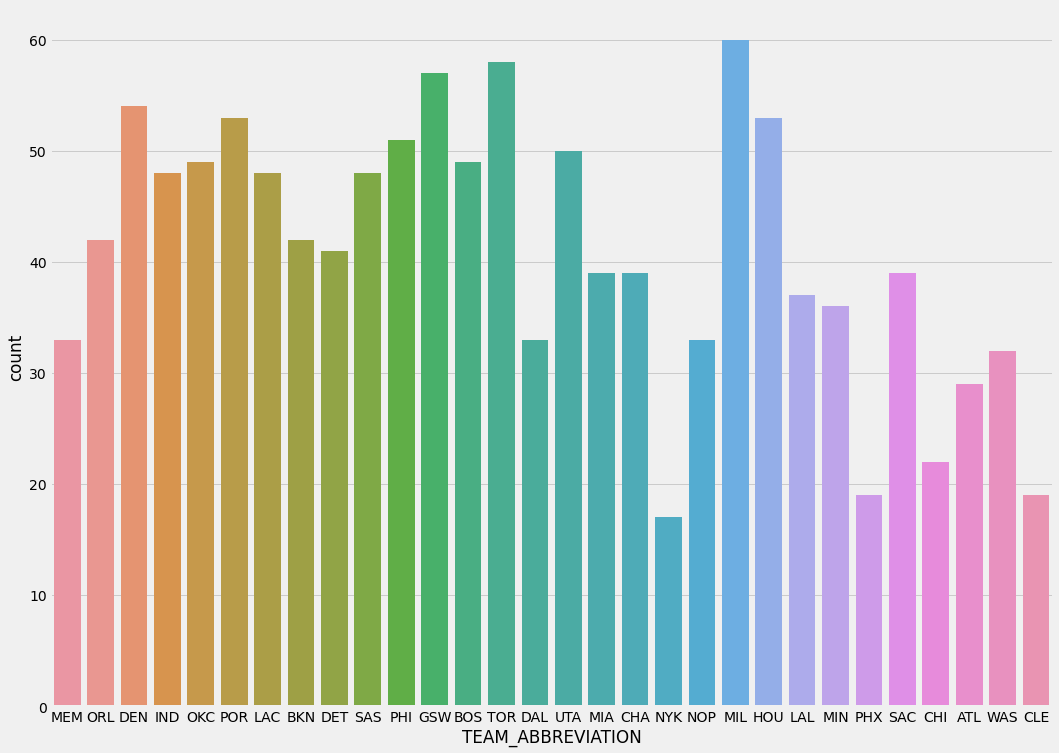

In [34]:
fig, ax = plt.subplots(figsize=(16,12))
sns.countplot(x='TEAM_ABBREVIATION', data=game_win_query, ax=ax);

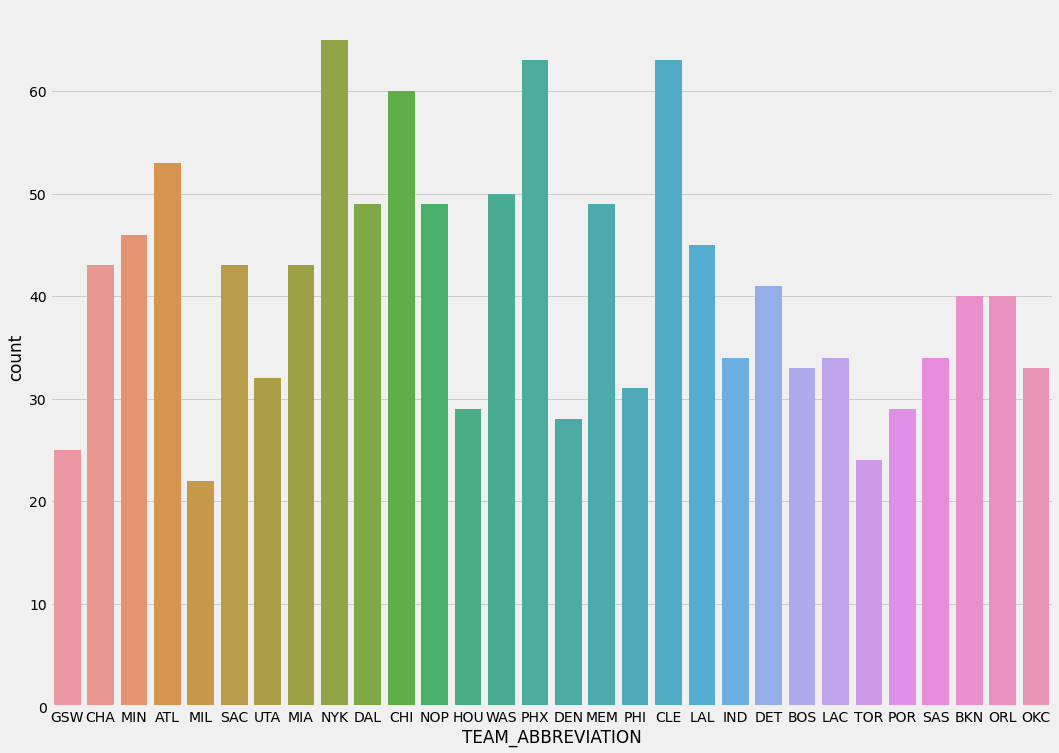

In [35]:
fig, ax = plt.subplots(figsize=(16,12))
sns.countplot(x='TEAM_ABBREVIATION', data=game_loss_query, ax=ax);

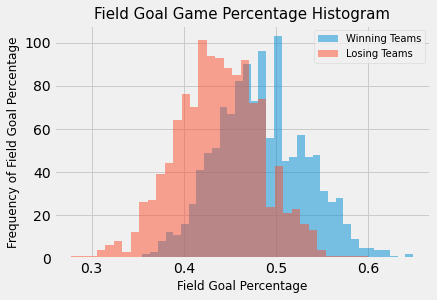

In [36]:
fig, ax = plt.subplots()
ax.hist(game_win_query['FG_PCT'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(game_loss_query['FG_PCT'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('Field Goal Percentage', size=12)
ax.set_ylabel('Frequency of Field Goal Percentage', size=12)
ax.set_title('Field Goal Game Percentage Histogram', size=15)
ax.legend(prop={'size': 10});

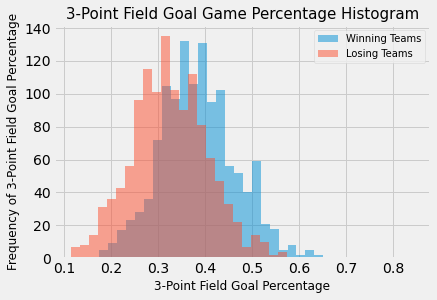

In [37]:
fig, ax = plt.subplots()
ax.hist(game_win_query['FG3_PCT'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(game_loss_query['FG3_PCT'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('3-Point Field Goal Percentage', size=12)
ax.set_ylabel('Frequency of 3-Point Field Goal Percentage', size=12)
ax.set_title('3-Point Field Goal Game Percentage Histogram', size=15)
ax.legend(prop={'size': 10});

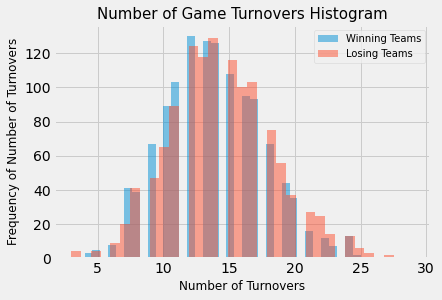

In [38]:
fig, ax = plt.subplots()
ax.hist(game_win_query['TOV'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(game_loss_query['TOV'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('Number of Turnovers', size=12)
ax.set_ylabel('Frequency of Number of Turnovers', size=12)
ax.set_title('Number of Game Turnovers Histogram', size=15)
ax.legend(prop={'size': 10});

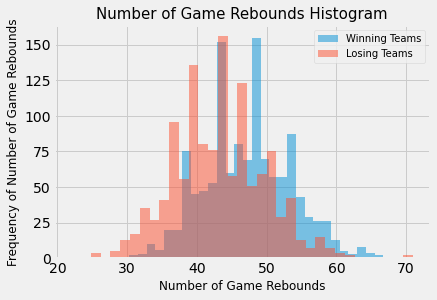

In [39]:
fig, ax = plt.subplots()
ax.hist(game_win_query['REB'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(game_loss_query['REB'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('Number of Game Rebounds', size=12)
ax.set_ylabel('Frequency of Number of Game Rebounds', size=12)
ax.set_title('Number of Game Rebounds Histogram', size=15)
ax.legend(prop={'size': 10});

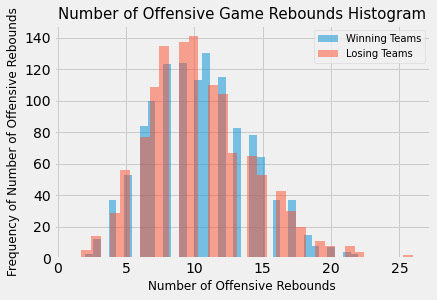

In [40]:
fig, ax = plt.subplots()
ax.hist(game_win_query['OREB'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(game_loss_query['OREB'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('Number of Offensive Rebounds', size=12)
ax.set_ylabel('Frequency of Number of Offensive Rebounds', size=12)
ax.set_title('Number of Offensive Game Rebounds Histogram', size=15)
ax.legend(prop={'size': 10});

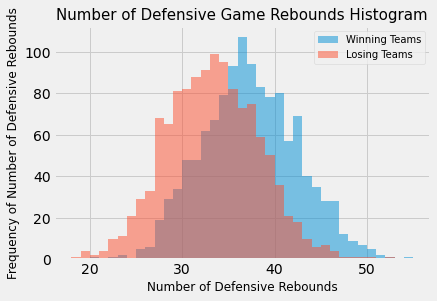

In [41]:
fig, ax = plt.subplots()
ax.hist(game_win_query['DREB'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(game_loss_query['DREB'], alpha=0.5, bins=35, label='Losing Teams');
ax.set_xlabel('Number of Defensive Rebounds', size=12)
ax.set_ylabel('Frequency of Number of Defensive Rebounds', size=12)
ax.set_title('Number of Defensive Game Rebounds Histogram', size=15)
ax.legend(prop={'size': 10});

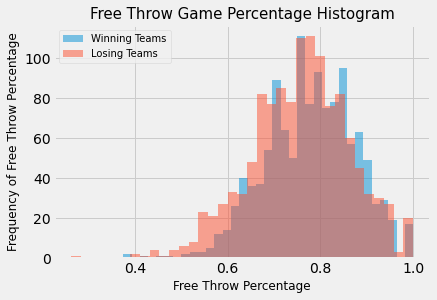

In [42]:
fig, ax = plt.subplots()
ax.hist(game_win_query['FT_PCT'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(game_loss_query['FT_PCT'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('Free Throw Percentage', size=12)
ax.set_ylabel('Frequency of Free Throw Percentage', size=12)
ax.set_title('Free Throw Game Percentage Histogram', size=15)
ax.legend(prop={'size': 10});

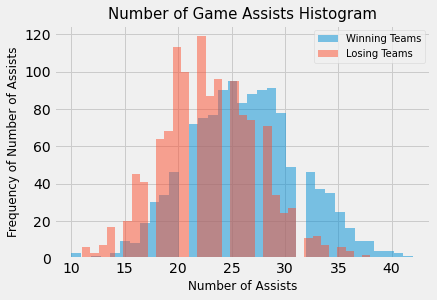

In [43]:
fig, ax = plt.subplots()
ax.hist(game_win_query['AST'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(game_loss_query['AST'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('Number of Assists', size=12)
ax.set_ylabel('Frequency of Number of Assists', size=12)
ax.set_title('Number of Game Assists Histogram', size=15)
ax.legend(prop={'size': 10});

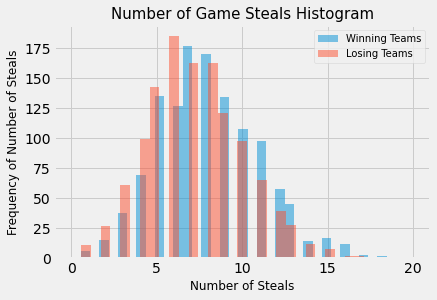

In [44]:
fig, ax = plt.subplots()
ax.hist(game_win_query['STL'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(game_loss_query['STL'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('Number of Steals', size=12)
ax.set_ylabel('Frequency of Number of Steals', size=12)
ax.set_title('Number of Game Steals Histogram', size=15)
ax.legend(prop={'size': 10});

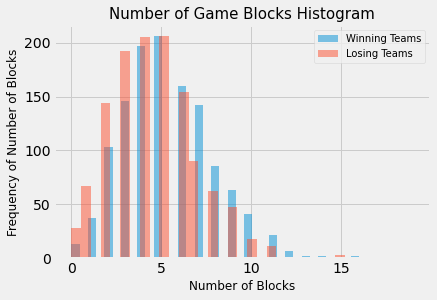

In [45]:
fig, ax = plt.subplots()
ax.hist(game_win_query['BLK'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(game_loss_query['BLK'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('Number of Blocks', size=12)
ax.set_ylabel('Frequency of Number of Blocks', size=12)
ax.set_title('Number of Game Blocks Histogram', size=15)
ax.legend(prop={'size': 10});

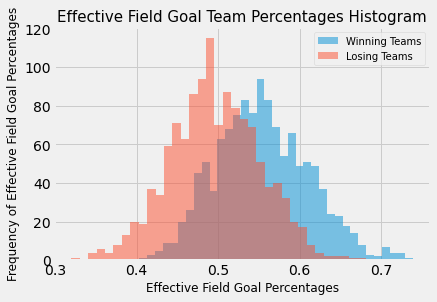

In [46]:
fig, ax = plt.subplots()
ax.hist(boxscore_win_query['EFG_PCT'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(boxscore_loss_query['EFG_PCT'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('Effective Field Goal Percentages', size=12)
ax.set_ylabel('Frequency of Effective Field Goal Percentages', size=12)
ax.set_title('Effective Field Goal Team Percentages Histogram', size=15)
ax.legend(prop={'size': 10});

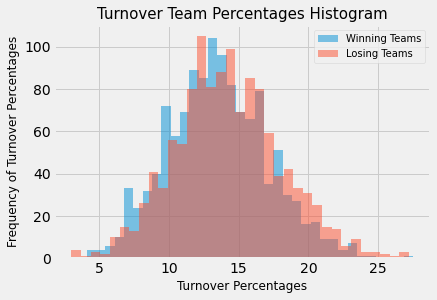

In [47]:
fig, ax = plt.subplots()
ax.hist(boxscore_win_query['TM_TOV_PCT'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(boxscore_loss_query['TM_TOV_PCT'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('Turnover Percentages', size=12)
ax.set_ylabel('Frequency of Turnover Percentages', size=12)
ax.set_title('Turnover Team Percentages Histogram', size=15)
ax.legend(prop={'size': 10});

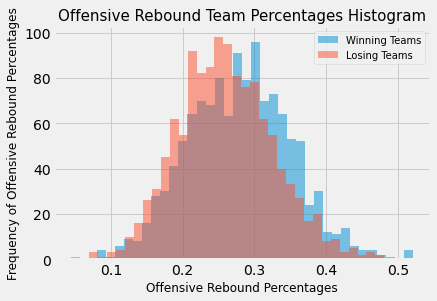

In [48]:
fig, ax = plt.subplots()
ax.hist(boxscore_win_query['OREB_PCT'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(boxscore_loss_query['OREB_PCT'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('Offensive Rebound Percentages', size=12)
ax.set_ylabel('Frequency of Offensive Rebound Percentages', size=12)
ax.set_title('Offensive Rebound Team Percentages Histogram', size=15)
ax.legend(prop={'size': 10});

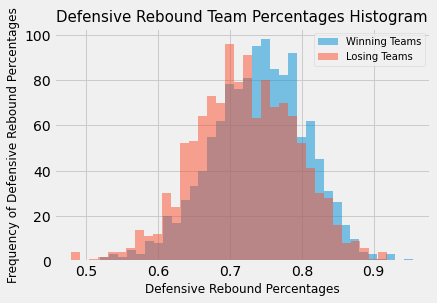

In [49]:
fig, ax = plt.subplots()
ax.hist(boxscore_win_query['DREB_PCT'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(boxscore_loss_query['DREB_PCT'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('Defensive Rebound Percentages', size=12)
ax.set_ylabel('Frequency of Defensive Rebound Percentages', size=12)
ax.set_title('Defensive Rebound Team Percentages Histogram', size=15)
ax.legend(prop={'size': 10});

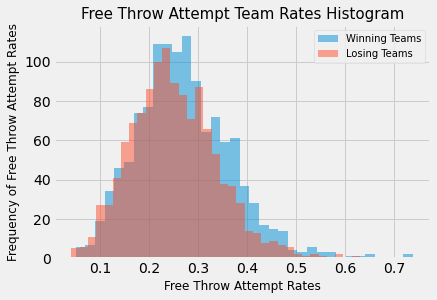

In [50]:
fig, ax = plt.subplots()
ax.hist(game_win_query['FTA_RATE'], alpha=0.5, bins=35, label='Winning Teams')
ax.hist(game_loss_query['FTA_RATE'], alpha=0.5, bins=35, label='Losing Teams')
ax.set_xlabel('Free Throw Attempt Rates', size=12)
ax.set_ylabel('Frequency of Free Throw Attempt Rates', size=12)
ax.set_title('Free Throw Attempt Team Rates Histogram', size=15)
ax.legend(prop={'size': 10});

### Hypothesis Tests

**Scientific question:** Is there a play between offensive and defensive play that is more effective in achieving a game win?

**Null:** There is no difference between the impact of offensive or defensive play in achieving a game win.

**Alternative:** There is a difference between the impact of offensive or defensive play in achieving a game win.

**Test statistic:** 2,460 regular season games from the 2018 - 19 NBA season
(=82 games per team * 30 NBA teams)

**Distribution under null hypothesis:** t distribution

**Significance Level:** 5%

#### Effective Field Goal Percentage

In [51]:
p_val_efg_pct = stats.ttest_ind(boxscore_win_query['EFG_PCT'], boxscore_loss_query['EFG_PCT'], equal_var=False)
print("p-value for effective field goal percentages of winning and losing teams: {:2.2f}".format(p_val_efg_pct[1]))

p-value for effective field goal percentages of winning and losing teams: 0.00


#### Team Turnover Percentage

In [52]:
p_val_tov_pct = stats.ttest_ind(boxscore_win_query['TM_TOV_PCT'], boxscore_loss_query['TM_TOV_PCT'], equal_var=False)
print("p-value for team turnover percentages of winning and losing teams: {:2.2f}".format(p_val_tov_pct[1]))

p-value for team turnover percentages of winning and losing teams: 0.00


#### Offensive Rebound Percentage

In [53]:
p_val_oreb_pct = stats.ttest_ind(boxscore_win_query['OREB_PCT'], boxscore_loss_query['OREB_PCT'], equal_var=False)
print("p-value for offensive rebound percentages of winning and losing teams: {:2.2f}".format(p_val_oreb_pct[1]))

p-value for offensive rebound percentages of winning and losing teams: 0.00


#### Defensive Rebound Percentage

In [54]:
p_val_dreb_pct = stats.ttest_ind(boxscore_win_query['DREB_PCT'], boxscore_loss_query['DREB_PCT'], equal_var=False)
print("p-value for defensive rebound percentages of winning and losing teams: {:2.2f}".format(p_val_dreb_pct[1]))

p-value for defensive rebound percentages of winning and losing teams: 0.00


#### Free Throw Attempt Rate

In [55]:
p_val_fta_rate = stats.ttest_ind(game_win_query['FTA_RATE'], game_loss_query['FTA_RATE'], equal_var=False)
print("p-value for free throw attempt rates of winning and losing teams: {:2.2f}".format(p_val_fta_rate[1]))

p-value for free throw attempt rates of winning and losing teams: 0.00


### Conclusion